In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, train_test_split

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 40)
random_state = 123456789

In [6]:

from sklearn.model_selection import train_test_split



In [7]:
url = pd.read_csv('C:/Users/Cassin/Desktop/IPEDS_data - Data.csv')

In [3]:
url

ID number                                               Name  year  \
0        100654                           Alabama A & M University  2013   
1        100663                University of Alabama at Birmingham  2013   
2        100690                                 Amridge University  2013   
3        100706                University of Alabama in Huntsville  2013   
4        100724                           Alabama State University  2013   
5        100751                          The University of Alabama  2013   
6        100812                            Athens State University  2013   
7        100830                    Auburn University at Montgomery  2013   
8        100858                                  Auburn University  2013   
9        100937                        Birmingham Southern College  2013   
10       101073                          Concordia College Alabama  2013   
11       101189                                Faulkner University  2013   
12       101435                                 Huntingdon College  2013   
13       101480                      Jacksonville State University  2013   
14       101541                                     Judson College  2013   
15       101587                         University of West Alabama  2013   
16       101675                                      Miles College  2013   
17       101693                               University of Mobile  2013   
18       101709                           University of Montevallo  2013   
19       101879                        University of North Alabama  2013   
20       101912                                 Oakwood University  2013   
21       102049                                 Samford University  2013   
22       102094                        University of South Alabama  2013   
23       102234                                Spring Hill College  2013   
24       102270                                   Stillman College  2013   
25       102298                                  Talladega College  2013   
26       102368                                    Troy University  2013   
27       102377                                Tuskegee University  2013   
28       102553                     University of Alaska Anchorage  2013   
29       102614                     University of Alaska Fairbanks  2013   
30       102632                     University of Alaska Southeast  2013   
31       102669                          Alaska Pacific University  2013   
32       103787  American Indian College of the Assemblies of G...  2013   
33       104151                     Arizona State University-Tempe  2013   
34       104179                              University of Arizona  2013   
35       104586      Embry-Riddle Aeronautical University-Prescott  2013   
36       105330                        Northern Arizona University  2013   
37       105367                          Ottawa University-Phoenix  2013   
38       105589                                   Prescott College  2013   
39       105899                       Arizona Christian University  2013   
40       106245              University of Arkansas at Little Rock  2013   
41       106306                           Arkansas Baptist College  2013   
42       106342                                       Lyon College  2013   
43       106397                             University of Arkansas  2013   
44       106412               University of Arkansas at Pine Bluff  2013   
45       106458              Arkansas State University-Main Campus  2013   
46       106467                           Arkansas Tech University  2013   
47       106485               University of Arkansas at Monticello  2013   
48       106704                     University of Central Arkansas  2013   
49       106713                            Central Baptist College  2013   
50       107044                                 Harding University  2013   
51       107071                         Henderson Stat

In [109]:
df1 = url

In [112]:
df1.head()

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
2     100690                   Amridge University  2013  36117-3553   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
2  Doctor's degree - research/scholarship and pro...  Montgomery County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
2                         -86.174010                         32.362609   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   

  Religious affiliation Offers Less than one year certificate  \
0        Not applicable                            Implied no   
1        Not applicable                            Implied no   
2    Churches of Christ                            Implied no   
3        Not applicable                                   Yes   
4        Not applicable                            Implied no   

  Offers One but less than two years certificate Offers Associate's degree  \
0                                     Implied no                Implied no   
1                                            Yes                Implied no   
2                                     Implied no                       Yes   
3                                     Implied no                Implied no   
4                                     Implied no                Implied no   

  Offers Two but less than 4 years certificate Offers Bachelor's degree  \
0                                   Implied no                      Yes   
1                                          Yes                      Yes   
2                                   Implied no                      Yes   
3                                   Implied no                      Yes   
4                                   Implied no                      Yes   

  Offers Postbaccalaureate certificate Offers Master's degree  \
0                           Implied no                    Yes   
1                                  Yes                    Yes   
2                           Implied no                    Yes   
3                                  Yes                    Yes   
4                           Implied no                    Yes   

  Offers Post-master's certificate  \
0                       Implied no   
1                              Yes   
2                       Implied no   
3                              Yes   
4                              Yes   

  Offers Doctor's degree - research/scholarship  \
0                                           Yes   
1                                           Yes   
2                                           Yes   
3                                           Yes   
4                                           Yes   

  Offers Doctor's degree - professional practice  \
0                                     Implied no   
1                                            Yes   
2                                            Yes   
3                                            Yes   
4                                            Yes   

  Offers Doctor's degree - other  \
0                     Implied no   
1                            Yes   
2                    

In [113]:
df1.shape

(1534, 145)

In [114]:
df1 = df1.dropna(subset = ['Admissions total', 'Applicants total'], axis = 0)

In [115]:
df1['is_religious'] = (df1['Religious affiliation'] != 'Not applicable') *1
df1['offers_associates'] = (df1["Offers Associate's degree"] == 'Yes')*1
df1['offers_bachelors'] = (df1["Offers Bachelor's degree"] == 'Yes')*1
df1['offers_masters'] = (df1["Offers Master's degree"] == 'Yes')*1
df1['is_private'] = (df1['Control of institution'] == 'Private not-for-profit')*1
df1['is_public'] = (df1['Control of institution'] == 'Public')*1

In [116]:
df1['Degree of urbanization (Urban-centric locale)'].value_counts(ascending = True)

Rural: Remote       13
Rural: Distant      25
Suburb: Small       31
Suburb: Midsize     47
Rural: Fringe       47
Town: Fringe        56
Town: Remote       116
Town: Distant      148
City: Midsize      167
City: Small        199
Suburb: Large      259
City: Large        269
Name: Degree of urbanization (Urban-centric locale), dtype: int64

In [117]:
features = ['offers_associates', 'offers_masters', 'Percent of freshmen submitting SAT scores', 'Percent of freshmen submitting ACT scores', 'SAT Critical Reading 25th percentile score', 
            'SAT Critical Reading 75th percentile score', 'SAT Math 25th percentile score', 'SAT Math 75th percentile score', 'SAT Writing 25th percentile score', 'SAT Writing 75th percentile score', 
            'ACT Composite 25th percentile score', 'ACT Composite 75th percentile score', 'Tuition and fees, 2013-14', 'Total  enrollment', 'Graduation rate - Bachelor degree within 4 years, total', 'Graduation rate - Bachelor degree within 6 years, total']

In [118]:
len(features)

16

In [119]:
model_df1 = df1[(features + ['Percent admitted - total'])].dropna().reset_index()

In [120]:
model_df1

index  offers_associates  offers_masters  \
0        5                  0               1   
1        8                  0               1   
2       14                  1               0   
3       18                  0               1   
4       21                  0               1   
5       22                  0               1   
6       23                  0               1   
7       31                  1               1   
8       34                  0               1   
9       35                  0               1   
10      36                  0               1   
11      38                  0               1   
12      42                  0               0   
13      44                  1               1   
14      45                  1               1   
15      46                  1               1   
16      49                  1               0   
17      53                  1               1   
18      59                  1               0   
19      61                  0               1   
20      63                  0               1   
21      64                  0               1   
22      81                  0               1   
23      82                  0               1   
24      83                  0               1   
25      84                  0               1   
26      85                  0               1   
27      86                  0               1   
28      87                  0               1   
29      88                  0               1   
30      90                  0               1   
31      91                  1               1   
32      92                  1               0   
33      94                  0               1   
34      96                  0               1   
35      98                  1               1   
36     100                  0               0   
37     106                  1               1   
38     108                  0               1   
39     110                  0               1   
40     111                  0               0   
41     112                  0               1   
42     116                  0               1   
43     117                  0               1   
44     118                  1               1   
45     119                  1               1   
46     120                  0               1   
47     124                  0               0   
48     129                  0               1   
49     132                  0               0   
50     133                  1               1   
51     134                  0               1   
52     137                  0               1   
53     138                  0               0   
54     139                  0               0   
55     140                  0               1   
56     142                  1               1   
57     147                  0               1   
58     148                  0               1   
59     151                  0               1   
60     161                  1               1   
61     162                  0               1   
62     166                  1               1   
63     171                  1               1   
64     172                  0               1   
65     175                  0               1   
66     176                  0               1   
67     177                  0               1   
68     179                  0               1   
69     180                  0               1   
70     181                  1               1   
71     182                  1               1   
72     184                  1               1   
73     188                  1               1   
74     190                  0               1   
75     192                  0               1   
76     194                  0               1   
77     196                  1               1   
78     199                  0               0   
79     200                  1               1   
80     201                  1       

In [121]:
train_df1,holdout_df1,y_train,y_holdout = train_test_split(model_df1[features],model_df1['Percent admitted - total'],
                                                         test_size=0.25,random_state = random_state)
train_df1['Percent admitted - total'] = y_train
holdout_df1['Percent admitted - total'] = y_holdout

train_df1.reset_index(inplace = True)
holdout_df1.reset_index(inplace = True)

In [122]:
k_fold = KFold(n_splits=5, random_state=random_state)

In [123]:
def get_cv_results(regressor):
    
    variance_results = []
    mae_results = []
    mse_results = []
    for train, test in k_fold.split(train_df1):
        regressor.fit(train_df1.loc[train, features], train_df1.loc[train, 'Percent admitted - total'])
        y_predicted = regressor.predict(train_df1.loc[test, features])
        
        #Accuracy score doesn't work for regression problems!
        #accuracy = accuracy_score(train_df.loc[test, 'Percent admitted - total'], y_predicted)
        y_true = train_df1.loc[test, 'Percent admitted - total']
        
        explained_variance = explained_variance_score(y_true, y_predicted)
        variance_results.append(explained_variance)
        
        mae = mean_absolute_error(y_true, y_predicted)
        mae_results.append(mae)
        
        mse = mean_squared_error(y_true, y_predicted)
        mse_results.append(mse)
        
        #results.append(accuracy)
        #print(accuracy)
    
    print('Mean Squared Error mean and std:')
    print(np.mean(mse_results))
    print(np.std(mse_results))
    
    print()
    
    print('Mean Absolute Error mean and std:')
    print(np.mean(mae_results))
    print(np.std(mae_results))
    
    print()
    
    print('Explained variance mean and std:')
    print(np.mean(variance_results))
    print(np.std(variance_results))

# Range of Acceptances

(array([ 23.,  28.,  47.,  81., 140., 245., 275., 289., 153.,  95.]),
 array([  6. ,  15.4,  24.8,  34.2,  43.6,  53. ,  62.4,  71.8,  81.2,
         90.6, 100. ]),
 <a list of 10 Patch objects>)

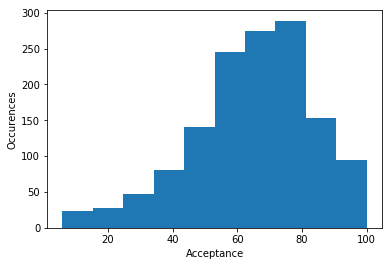

In [124]:
plt.xlabel('Acceptance')
plt.ylabel('Occurences')
plt.hist(df1['Percent admitted - total'])

In [125]:
print(np.mean(df1['Percent admitted - total']))

64.56976744186046


In [126]:
print(np.std(df1['Percent admitted - total']))

18.703261559663115


In [127]:
dtree = DecisionTreeRegressor(
    random_state=random_state, 
    #max_depth=max_depth
)

get_cv_results(dtree)

Mean Squared Error mean and std:
306.5442632498544
28.189107426666496

Mean Absolute Error mean and std:
13.405261114346729
0.5052457269638423

Explained variance mean and std:
0.25143308383103713
0.09800043960061258


In [128]:
rforest = RandomForestRegressor(
    random_state=random_state, 
    #max_depth=max_depth,
    n_estimators=1000
)

get_cv_results(rforest)

Mean Squared Error mean and std:
183.40009138316833
7.549063922536559

Mean Absolute Error mean and std:
10.374500310619297
0.33469157648987957

Explained variance mean and std:
0.5485768991739425
0.035908405144239965


In [129]:
gbm = GradientBoostingRegressor(
    random_state=random_state, 
    #max_depth=max_depth,
    n_estimators=100
)

get_cv_results(gbm)

Mean Squared Error mean and std:
198.17334418665817
15.1410198682038

Mean Absolute Error mean and std:
10.807048946270617
0.44741076509848365

Explained variance mean and std:
0.5151266772788544
0.03650882985216814


In [130]:
dummy = DummyRegressor(strategy='median')
get_cv_results(dummy)

Mean Squared Error mean and std:
413.20818287711126
32.056661057291834

Mean Absolute Error mean and std:
15.703203261502622
0.8085904217848633

Explained variance mean and std:
0.0
0.0


# Important Features

In [131]:
important_features_dict = {}
for x,i in enumerate(rforest.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

feats = []
for i in range(len(features)):
  feats.append(features[important_features_list[i]])
print('Most important features: %s' %feats)

Most important features: ['SAT Writing 25th percentile score', 'SAT Writing 75th percentile score', 'SAT Math 25th percentile score', 'Graduation rate - Bachelor degree within 6 years, total', 'SAT Math 75th percentile score', 'ACT Composite 25th percentile score', 'Tuition and fees, 2013-14', 'Percent of freshmen submitting ACT scores', 'Total  enrollment', 'Graduation rate - Bachelor degree within 4 years, total', 'Percent of freshmen submitting SAT scores', 'SAT Critical Reading 75th percentile score', 'SAT Critical Reading 25th percentile score', 'ACT Composite 75th percentile score', 'offers_associates', 'offers_masters']


In [132]:
df1.head()

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   
5     100751            The University of Alabama  2013  35487-0166   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   
5  Doctor's degree - research/scholarship and pro...  Tuscaloosa County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   
5                         -87.545766                         33.214400   

  Religious affiliation Offers Less than one year certificate  \
0        Not applicable                            Implied no   
1        Not applicable                            Implied no   
3        Not applicable                                   Yes   
4        Not applicable                            Implied no   
5        Not applicable                            Implied no   

  Offers One but less than two years certificate Offers Associate's degree  \
0                                     Implied no                Implied no   
1                                            Yes                Implied no   
3                                     Implied no                Implied no   
4                                     Implied no                Implied no   
5                                     Implied no                Implied no   

  Offers Two but less than 4 years certificate Offers Bachelor's degree  \
0                                   Implied no                      Yes   
1                                          Yes                      Yes   
3                                   Implied no                      Yes   
4                                   Implied no                      Yes   
5                                   Implied no                      Yes   

  Offers Postbaccalaureate certificate Offers Master's degree  \
0                           Implied no                    Yes   
1                                  Yes                    Yes   
3                                  Yes                    Yes   
4                           Implied no                    Yes   
5                           Implied no                    Yes   

  Offers Post-master's certificate  \
0                       Implied no   
1                              Yes   
3                              Yes   
4                              Yes   
5                              Yes   

  Offers Doctor's degree - research/scholarship  \
0                                           Yes   
1                                           Yes   
3                                           Yes   
4                                           Yes   
5                                           Yes   

  Offers Doctor's degree - professional practice  \
0                                     Implied no   
1                                            Yes   
3                                            Yes   
4                                            Yes   
5                                            Yes   

  Offers Doctor's degree - other    ...      \
0                     Implied no    ...       
1                            Yes   

In [133]:
pass_rate = df1[["Number of students receiving an Associate's degree","Number of students receiving a Bachelor's degree",
                "Number of students receiving a Master's degree","Number of students receiving a Doctor's degree",
                "Number of students receiving a certificate of less than 1-year","Number of students receiving a certificate of 1 but less than 4-years",
                "Number of students receiving a Postbaccalaureate or Post-master's certificate"]].mean(axis=1)

In [134]:
pass_rate

0        119.142857
1        617.714286
3        228.714286
4        117.285714
5       1020.428571
7        115.714286
8        828.714286
9         42.714286
12        31.000000
13       253.571429
14         8.285714
15       165.714286
17        50.857143
18        74.714286
19       184.285714
20        54.857143
21       194.285714
22       412.285714
23        38.714286
24        19.571429
26       693.428571
27        64.571429
31        19.000000
33      1841.571429
34      1306.571429
35        48.000000
36       929.714286
38        42.428571
39        12.000000
40       340.142857
42        17.142857
43       685.428571
44        61.285714
45       562.428571
46       361.142857
48       287.428571
49        18.571429
50       179.142857
51       113.000000
52        46.857143
53        87.285714
54        42.000000
55        10.000000
57        16.000000
58       102.000000
59       186.285714
60       389.428571
61       190.571429
63       180.428571
64        84.285714


In [135]:
df1["Overall_Pass"] = pass_rate

In [136]:
df1.head()

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   
5     100751            The University of Alabama  2013  35487-0166   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   
5  Doctor's degree - research/scholarship and pro...  Tuscaloosa County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   
5                         -87.545766                         33.214400   

  Religious affiliation Offers Less than one year certificate  \
0        Not applicable                            Implied no   
1        Not applicable                            Implied no   
3        Not applicable                                   Yes   
4        Not applicable                            Implied no   
5        Not applicable                            Implied no   

  Offers One but less than two years certificate Offers Associate's degree  \
0                                     Implied no                Implied no   
1                                            Yes                Implied no   
3                                     Implied no                Implied no   
4                                     Implied no                Implied no   
5                                     Implied no                Implied no   

  Offers Two but less than 4 years certificate Offers Bachelor's degree  \
0                                   Implied no                      Yes   
1                                          Yes                      Yes   
3                                   Implied no                      Yes   
4                                   Implied no                      Yes   
5                                   Implied no                      Yes   

  Offers Postbaccalaureate certificate Offers Master's degree  \
0                           Implied no                    Yes   
1                                  Yes                    Yes   
3                                  Yes                    Yes   
4                           Implied no                    Yes   
5                           Implied no                    Yes   

  Offers Post-master's certificate  \
0                       Implied no   
1                              Yes   
3                              Yes   
4                              Yes   
5                              Yes   

  Offers Doctor's degree - research/scholarship  \
0                                           Yes   
1                                           Yes   
3                                           Yes   
4                                           Yes   
5                                           Yes   

  Offers Doctor's degree - professional practice  \
0                                     Implied no   
1                                            Yes   
3                                            Yes   
4                                            Yes   
5                                            Yes   

  Offers Doctor's degree - other      ...       \
0                     Implied no      ...        
1                            

In [137]:
cost = df1[['Total price for in-state students living on campus 2013-14','Total price for out-of-state students living on campus 2013-14']].mean(axis=1)

In [79]:
cost.head()

0    24645.0
1    27091.0
3    29623.0
4    21754.0
5    34250.0
dtype: float64

In [138]:
df1['Overall_Cost'] = cost

In [139]:
df1.head()

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   
5     100751            The University of Alabama  2013  35487-0166   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   
5  Doctor's degree - research/scholarship and pro...  Tuscaloosa County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   
5                         -87.545766                         33.214400   

  Religious affiliation Offers Less than one year certificate  \
0        Not applicable                            Implied no   
1        Not applicable                            Implied no   
3        Not applicable                                   Yes   
4        Not applicable                            Implied no   
5        Not applicable                            Implied no   

  Offers One but less than two years certificate Offers Associate's degree  \
0                                     Implied no                Implied no   
1                                            Yes                Implied no   
3                                     Implied no                Implied no   
4                                     Implied no                Implied no   
5                                     Implied no                Implied no   

  Offers Two but less than 4 years certificate Offers Bachelor's degree  \
0                                   Implied no                      Yes   
1                                          Yes                      Yes   
3                                   Implied no                      Yes   
4                                   Implied no                      Yes   
5                                   Implied no                      Yes   

  Offers Postbaccalaureate certificate Offers Master's degree  \
0                           Implied no                    Yes   
1                                  Yes                    Yes   
3                                  Yes                    Yes   
4                           Implied no                    Yes   
5                           Implied no                    Yes   

  Offers Post-master's certificate  \
0                       Implied no   
1                              Yes   
3                              Yes   
4                              Yes   
5                              Yes   

  Offers Doctor's degree - research/scholarship  \
0                                           Yes   
1                                           Yes   
3                                           Yes   
4                                           Yes   
5                                           Yes   

  Offers Doctor's degree - professional practice  \
0                                     Implied no   
1                                            Yes   
3                                            Yes   
4                                            Yes   
5                                            Yes   

  Offers Doctor's degree - other      ...       \
0                     Implied no      ...        
1                            

In [140]:
df1 = df1.drop(['Overall_Cost'],axis=1)

In [141]:
df1.head()

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   
5     100751            The University of Alabama  2013  35487-0166   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   
5  Doctor's degree - research/scholarship and pro...  Tuscaloosa County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   
5                         -87.545766                         33.214400   

  Religious affiliation Offers Less than one year certificate  \
0        Not applicable                            Implied no   
1        Not applicable                            Implied no   
3        Not applicable                                   Yes   
4        Not applicable                            Implied no   
5        Not applicable                            Implied no   

  Offers One but less than two years certificate Offers Associate's degree  \
0                                     Implied no                Implied no   
1                                            Yes                Implied no   
3                                     Implied no                Implied no   
4                                     Implied no                Implied no   
5                                     Implied no                Implied no   

  Offers Two but less than 4 years certificate Offers Bachelor's degree  \
0                                   Implied no                      Yes   
1                                          Yes                      Yes   
3                                   Implied no                      Yes   
4                                   Implied no                      Yes   
5                                   Implied no                      Yes   

  Offers Postbaccalaureate certificate Offers Master's degree  \
0                           Implied no                    Yes   
1                                  Yes                    Yes   
3                                  Yes                    Yes   
4                           Implied no                    Yes   
5                           Implied no                    Yes   

  Offers Post-master's certificate  \
0                       Implied no   
1                              Yes   
3                              Yes   
4                              Yes   
5                              Yes   

  Offers Doctor's degree - research/scholarship  \
0                                           Yes   
1                                           Yes   
3                                           Yes   
4                                           Yes   
5                                           Yes   

  Offers Doctor's degree - professional practice  \
0                                     Implied no   
1                                            Yes   
3                                            Yes   
4                                            Yes   
5                                            Yes   

  Offers Doctor's degree - other      ...       \
0                     Implied no      ...        
1                            

Text(0, 0.5, 'Pass Percentage')

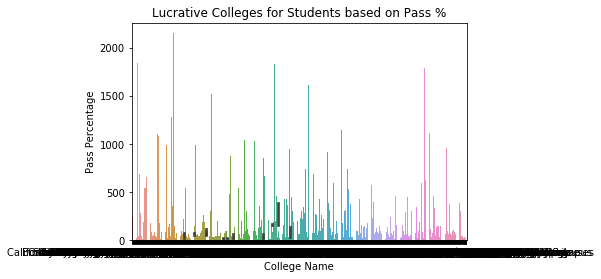

<Figure size 5760x720 with 0 Axes>

In [148]:
bar = sns.barplot(x ='Name',y = 'Overall_Pass',data=df1)
plt.figure(figsize=(80,10))
bar.set_title('Lucrative Colleges for Students based on Pass %')
bar.set_xlabel('College Name')
bar.set_ylabel('Pass Percentage')

In [143]:
import seaborn as sns

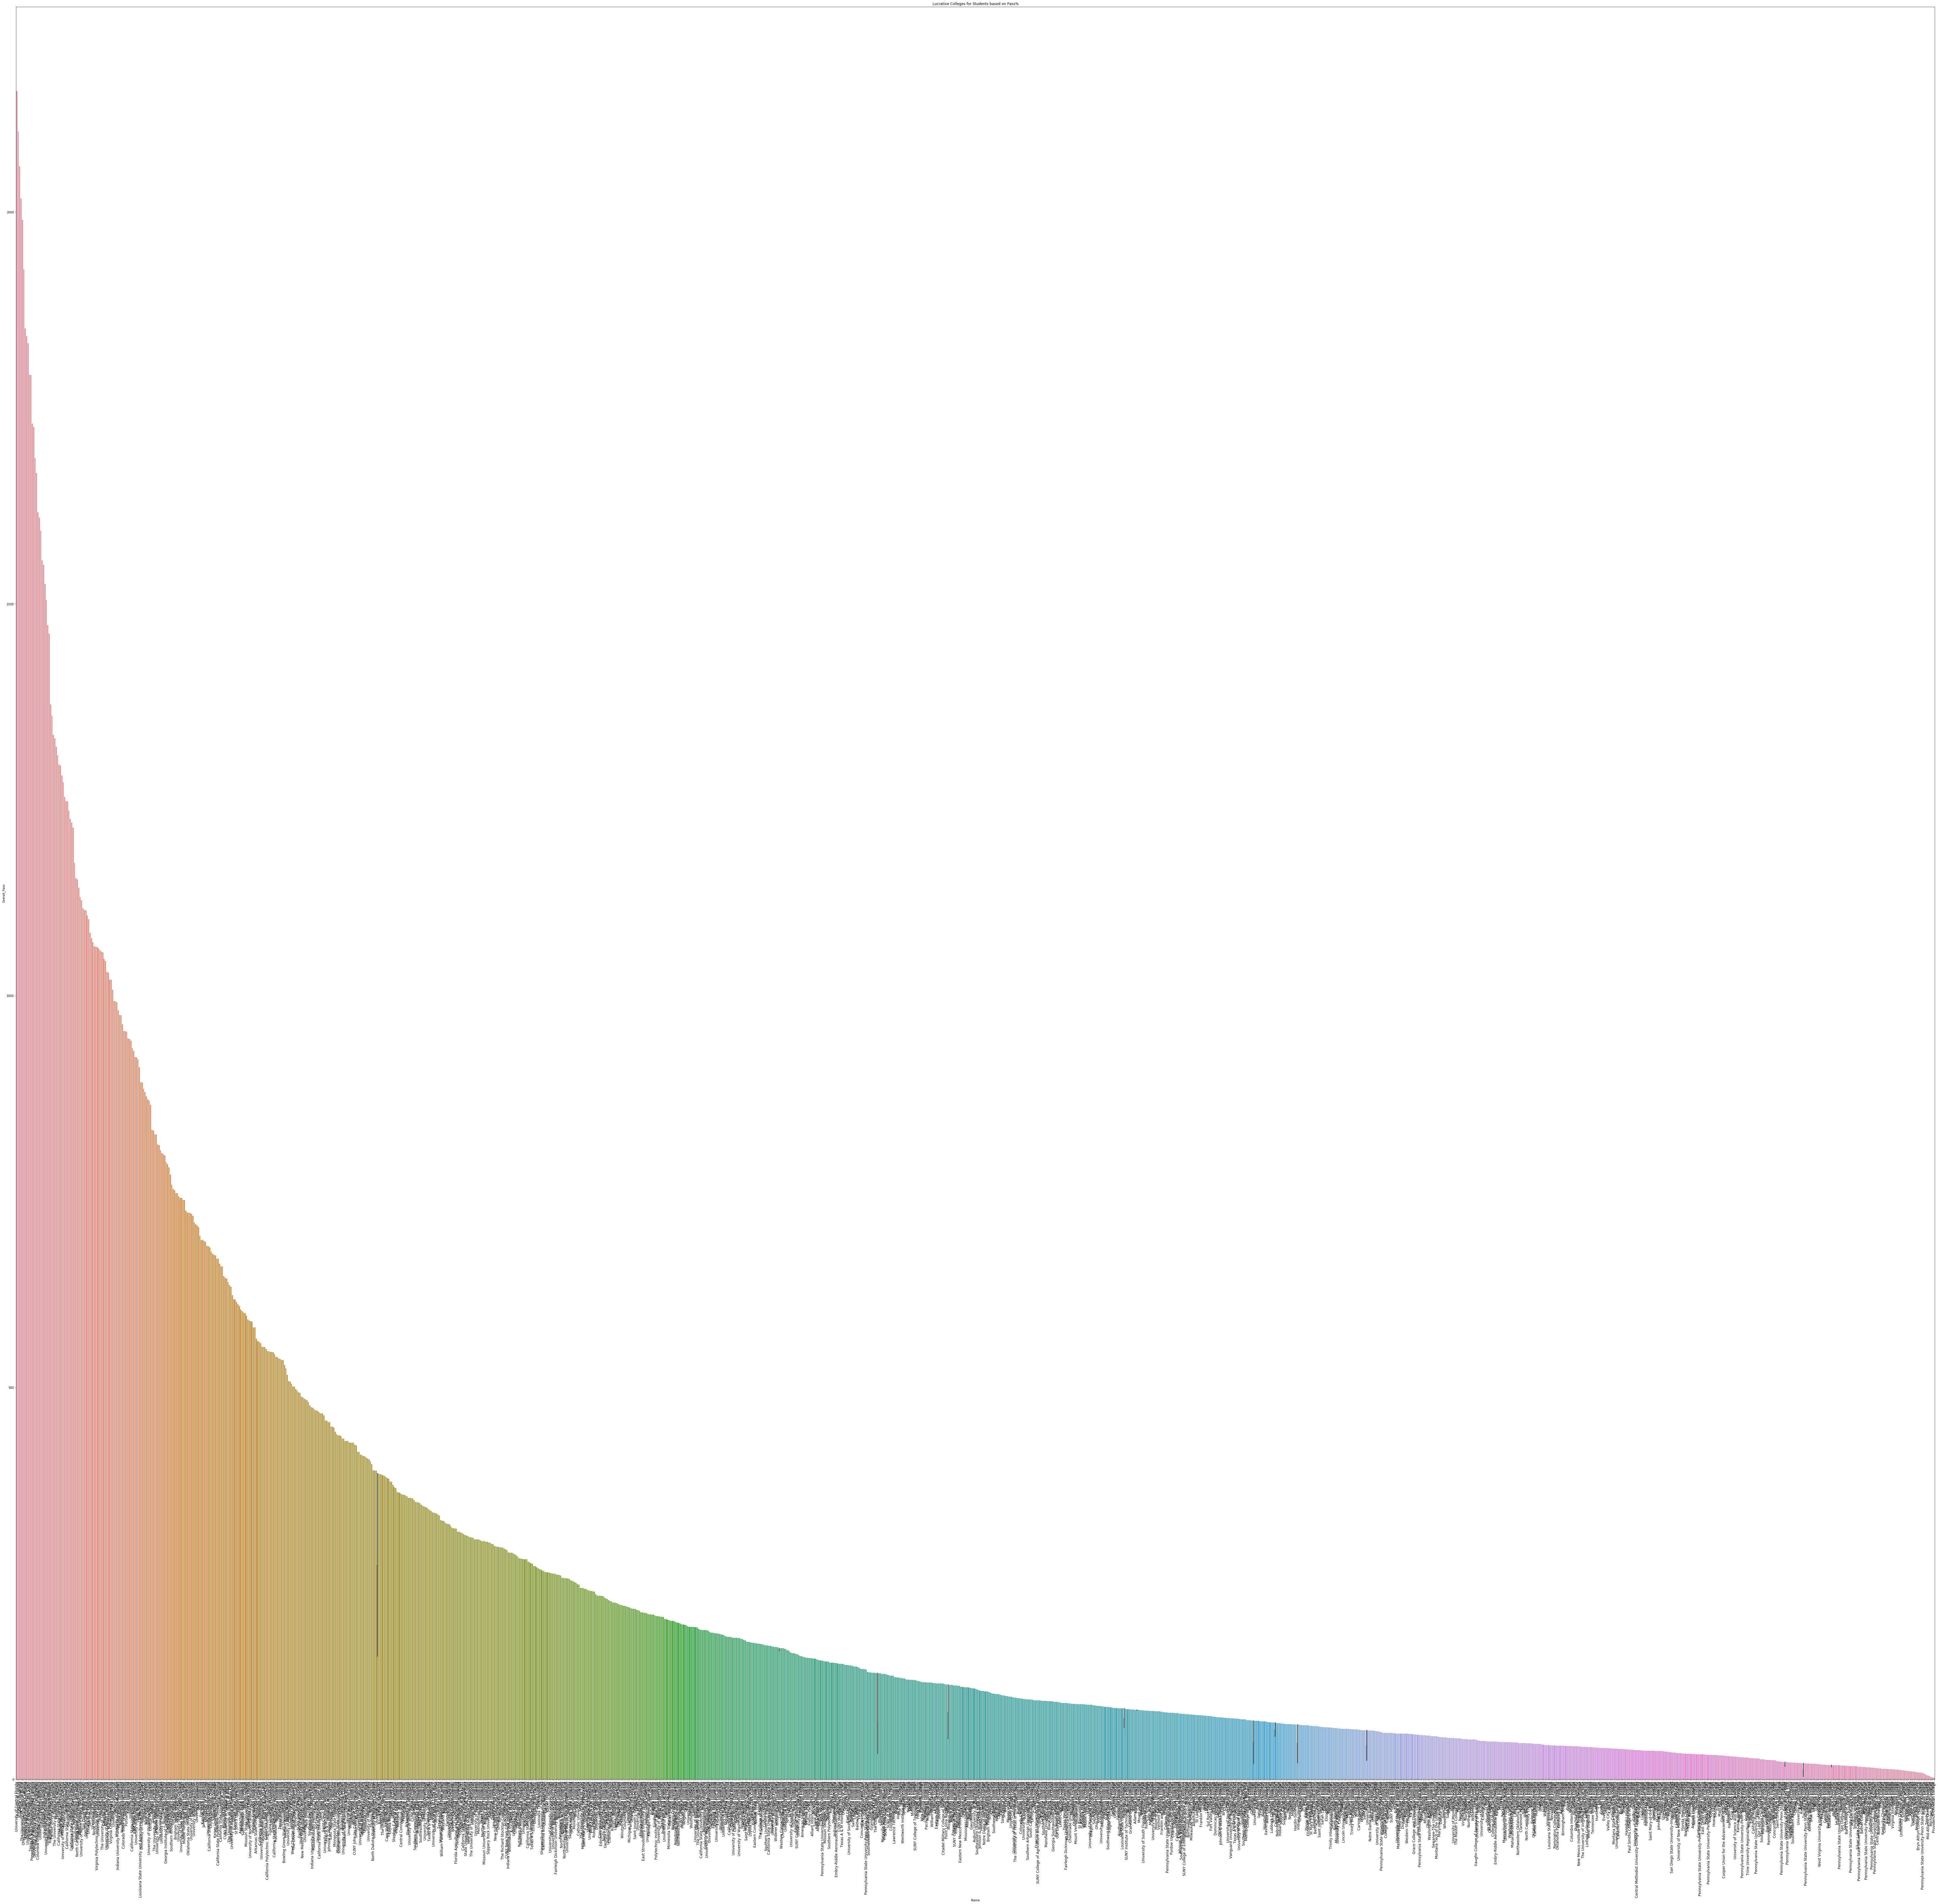

In [171]:
df1 = df1.sort_values("Overall_Pass",ascending = False).reset_index(drop=True)
f,ax = plt.subplots(figsize=(5000,100))
f = plt.gcf()
f.set_size_inches( 116, 110)
ax.set_xticklabels(df1["Name"], rotation="vertical", fontsize="large")
g = sns.barplot(y = df1["Overall_Pass"], x = df1["Name"])
plt.title("Lucrative Colleges for Students based on Pass%")
plt.show()

## 

In [168]:
df2 = df1.sort_values("Overall_Pass",ascending = False).reset_index(drop=True)

ValueError: No axis named Overall_Cost for object type <class 'pandas.core.frame.DataFrame'>

In [165]:
df2

ID number                                               Name  year  \
0        132903                      University of Central Florida  2013   
1        134130                              University of Florida  2013   
2        232557                                 Liberty University  2013   
3        193900                                New York University  2013   
4        228778                  The University of Texas at Austin  2013   
5        204796                  Ohio State University-Main Campus  2013   
6        123961                  University of Southern California  2013   
7        104151                     Arizona State University-Tempe  2013   
8        174066                University of Minnesota-Twin Cities  2013   
9        170976                   University of Michigan-Ann Arbor  2013   
10       228723             Texas A & M University-College Station  2013   
11       214777          Pennsylvania State University-Main Campus  2013   
12       236948            University of Washington-Seattle Campus  2013   
13       145637         University of Illinois at Urbana-Champaign  2013   
14       110662               University of California-Los Angeles  2013   
15       190150        Columbia University in the City of New York  2013   
16       133951                   Florida International University  2013   
17       110635                  University of California-Berkeley  2013   
18       134097                           Florida State University  2013   
19       171100                          Michigan State University  2013   
20       151351                     Indiana University-Bloomington  2013   
21       137351            University of South Florida-Main Campus  2013   
22       163286                University of Maryland-College Park  2013   
23       240444                    University of Wisconsin-Madison  2013   
24       186380                   Rutgers University-New Brunswick  2013   
25       243780                      Purdue University-Main Campus  2013   
26       164988                                  Boston University  2013   
27       228769               The University of Texas at Arlington  2013   
28       139959                              University of Georgia  2013   
29       104179                              University of Arizona  2013   
30       110565              California State University-Fullerton  2013   
31       110644                     University of California-Davis  2013   
32       131469                       George Washington University  2013   
33       215293         University of Pittsburgh-Pittsburgh Campus  2013   
34       227216                          University of North Texas  2013   
35       216339                                  Temple University  2013   
36       110608             California State University-Northridge  2013   
37       232186                            George Mason University  2013   
38       225511                              University of Houston  2013   
39       110583             California State University-Long Beach  2013   
40       201885               University of Cincinnati-Main Campus  2013   
41       167358                            Northeastern University  2013   
42       110680                 University of California-San Diego  2013   
43       199193         North Carolina State University at Raleigh  2013   
44       230038                     Brigham Young University-Provo  2013   
45       204857                        Ohio University-Main Campus  2013   
46       199120        University of North Carolina at Chapel Hill  2013   
47       230764                                 University of Utah  2013   
48       122409                         San Diego State University  2013   
49       122597                     San Francisco State University  2013   
50       178396                    University of Missouri-Columbia  2013   
51       110653                    University of Calif

In [157]:
df1["Overall_Cost"] = cost

In [158]:
df1.head()

ID number                               Name  year    ZIP code  \
0     132903      University of Central Florida  2013       32816   
1     134130              University of Florida  2013       32611   
2     232557                 Liberty University  2013       24515   
3     193900                New York University  2013  10012-1091   
4     228778  The University of Texas at Austin  2013       78712   

                              Highest degree offered      County name  \
0  Doctor's degree - research/scholarship and pro...    Orange County   
1  Doctor's degree - research/scholarship and pro...   Alachua County   
2  Doctor's degree - research/scholarship and pro...   Lynchburg city   
3  Doctor's degree - research/scholarship and pro...  New York County   
4  Doctor's degree - research/scholarship and pro...    Travis County   

   Longitude location of institution  Latitude location of institution  \
0                         -81.198805                         28.601060   
1                         -82.361195                         29.638248   
2                         -79.179688                         37.350345   
3                         -73.997264                         40.729452   
4                         -97.737279                         30.284733   

   Religious affiliation Offers Less than one year certificate  \
0         Not applicable                            Implied no   
1         Not applicable                            Implied no   
2  Evangelical Christian                                   Yes   
3         Not applicable                                   Yes   
4         Not applicable                                   Yes   

  Offers One but less than two years certificate Offers Associate's degree  \
0                                     Implied no                       Yes   
1                                            Yes                       Yes   
2                                            Yes                       Yes   
3                                     Implied no                       Yes   
4                                     Implied no                Implied no   

  Offers Two but less than 4 years certificate Offers Bachelor's degree  \
0                                   Implied no                      Yes   
1                                   Implied no                      Yes   
2                                   Implied no                      Yes   
3                                   Implied no                      Yes   
4                                   Implied no                      Yes   

  Offers Postbaccalaureate certificate Offers Master's degree  \
0                           Implied no                    Yes   
1                                  Yes                    Yes   
2                           Implied no                    Yes   
3                           Implied no                    Yes   
4                                  Yes                    Yes   

  Offers Post-master's certificate  \
0                              Yes   
1                              Yes   
2                              Yes   
3                              Yes   
4                       Implied no   

  Offers Doctor's degree - research/scholarship  \
0                                           Yes   
1                                           Yes   
2                                           Yes   
3                                           Yes   
4                                           Yes   

  Offers Doctor's degree - professional practice  \
0                                            Yes   
1                                            Yes   
2                                            Yes   
3                                            Yes   
4                                            Yes   

  Offers Doctor's degree - other      ...       \
0                     Implied no      ...        
1                     Implied no      ...      

In [166]:
df3 = df1.sort_values("Overall_Cost",ascending = False)

In [167]:
df3

ID number                                               Name  year  \
289      186584                              Seton Hall University  2013   
793      153366                        Graceland University-Lamoni  2013   
858      439288                  Johnson & Wales University-Denver  2013   
100      199139          University of North Carolina at Charlotte  2013   
841      195216                             St Lawrence University  2013   
815      168218                                  Wellesley College  2013   
117      187985               University of New Mexico-Main Campus  2013   
734      213987                              Mercyhurst University  2013   
320      240329                  University of Wisconsin-La Crosse  2013   
177      110538                  California State University-Chico  2013   
785      159416              Louisiana State University-Shreveport  2013   
176      196079                                 SUNY at Binghamton  2013   
137      110592            California State University-Los Angeles  2013   
189      223232                                  Baylor University  2013   
991      128391                  Western State Colorado University  2013   
1069     153861                 Maharishi University of Management  2013   
94       207500               University of Oklahoma-Norman Campus  2013   
1340     133085                       Clearwater Christian College  2013   
1092     191533                                   Hartwick College  2013   
578      148496                               Dominican University  2013   
848      213385                                  Lafayette College  2013   
698      200253                             Minot State University  2013   
1140     153162                                    Cornell College  2013   
908      191515                                   Hamilton College  2013   
179      171571                                 Oakland University  2013   
796      151786                                  Marian University  2013   
522      209056                              Lewis & Clark College  2013   
786      177418                               Fontbonne University  2013   
503      129242                               Fairfield University  2013   
529      165866                        Framingham State University  2013   
188      202134                         Cleveland State University  2013   
123      137032                               Saint Leo University  2013   
564      165334                                   Clark University  2013   
132      155399                            Kansas State University  2013   
1297     210304                             Warner Pacific College  2013   
851      139719                       Fort Valley State University  2013   
897      174747                          College of Saint Benedict  2013   
121      209542                            Oregon State University  2013   
477      128744                           University of Bridgeport  2013   
1258     169363                     Concordia University-Ann Arbor  2013   
530      165662                                    Emerson College  2013   
1067     164720                                     Becker College  2013   
570      217059                          York College Pennsylvania  2013   
478      173665                                 Hamline University  2013   
215      110547        California State University-Dominguez Hills  2013   
860      211273                                  Bryn Mawr College  2013   
164      204024                            Miami University-Oxford  2013   
1085     206835                       Oklahoma Wesleyan University  2013   
528      174899                   The College of Saint Scholastica  2013   
1158     176947  Central Methodist University-College of Libera...  2013   
769      204617                          Ohio Dominican University  2013   
1171     154101                               Northwes

In [183]:
import plotly

In [184]:
plotly.__version__

'3.10.0'

In [185]:
import plotly.plotly as py
import plotly.graph_objs as go

In [248]:
t1 = [go.Bar(x=df2['Name'],y=df2['Overall_Pass'],width = [5],name = 'Overall Pass')]

In [246]:
t2 = [go.Bar(x=df3['Name'],y=df3['Overall_Cost'],width = [5],name = 'Overall Cost')]

In [249]:
py.iplot(t1, filename='basic-bar')

C:\Users\Cassin\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [203]:
plotly.tools.set_credentials_file(username='cassinthangam4996', api_key='JdhWsnSGXE8nBvs8ex3Y')

In [205]:
plotly.tools.set_config_file(world_readable=True,
                             sharing='public')

In [247]:
py.iplot(t2, filename='basic-bar')

C:\Users\Cassin\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

